### Foreseeing Variable Problems When Building ML Models

* Numerical variables take numbers as values and can be discrete or continuous
* Categorical variables - values are selected from a group of categories, also called labels
* Variables in their original, raw format are not suitable to train machine learning algorithms
* We need to consider many aspects of a variable to build powerful machine learning models
* These aspects include variable type, missing data, cardinality and category frequency, variable distribution and its relationship with the target, outliers, and feature magnitude

1. scikit-learn, the open source Python library for machine learning, does not support missing values or strings (the categories) as inputs for machine learning algorithms, so we need to convert those values into numbers
2. the number of missing values or the distributions of the strings in categorical variables (known as cardinality and frequency) may affect model performance or inform the technique we should implement to replace them by numbers
3. some machine learning algorithms make assumptions about the distributions of the variables and their relationship with the target. Finally, variable distribution, outliers, and feature magnitude may also affect machine learning model performance. 
* Therefore, it is important to understand, identify, and quantify all these aspects of a variable to be able to choose the appropriate feature engineering technique.

### 1. Identifying numerical and categorical variables

* $\textbf{Discrete variables}$ are generally whole numbers, such as 1, 2, and 3.
* Examples of discrete variables - number of children, number of pets, number of bank accounts etc.,
* $\textbf{Continuous variables}$ are those whose values may take any number within a range
* Examples of continuous variables include price of a product, income, house price, interest rate etc.,
* $\textbf{Categorical variables}$ are values that are selected from a group of categories, also called labels
* Examples of categorical variables - gender (male, female), country of birth(Argentina, Germany) etc.,
* Discrete variables are usually of the int type, continuous variables are usually of the float type, and categorical variables are usually of the object type when they're stored in pandas
* In many datasets, integer variables are cast as float. So, after inspecting the data type of the variable, even if you get float as output, go ahead and check the unique values to make sure that those variables are discrete and not continuous

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

<AxesSubplot:>

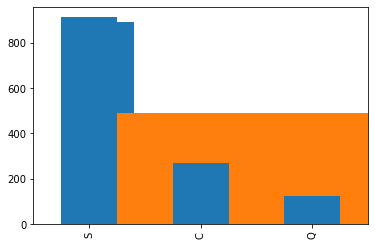

In [2]:
df = pd.read_csv("titanic.csv")
df.dtypes # to identify datatypes of each feature
df["sibsp"].unique() # to identify unique values of a given feature
df["fare"].unique()[:20] # to inspect first 20 distinct values of a given feature
df["sibsp"].hist(bins=20) # data visualization using histogram to identify type of variable
df["fare"].hist(bins=50) # data visualization using histogram to identify type of variable
df["embarked"].value_counts().plot.bar() # data visualization using bar plot to identify type of variable

### 2. Quantifying missing data

Text(0.5, 1.0, 'Quantifying missing data')

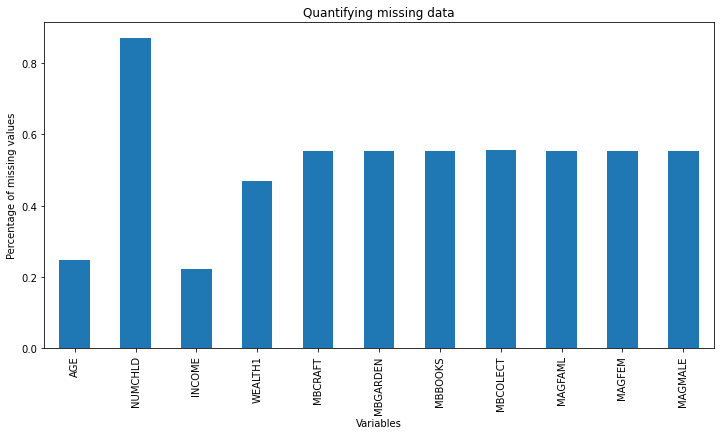

In [3]:
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']
df = pd.read_csv('cup98LRN.txt', usecols=cols)
df.isnull().sum() # number of missing values in each variable 
df.isnull().mean() # percentage of missing values in each variable
df.isnull().mean().plot.bar(figsize=(12,6)) # bar plot with the percentage of missing values in each variable
plt.xlabel("Variables")
plt.ylabel("Percentage of missing values")
plt.title("Quantifying missing data")

### 3. Determining cardinality in categorical variables

* The number of unique categories in a variable is called cardinality
* Examples - cardinality of Gender (female, male) is 2, cardinality of Civil status (married, divorced, singled, widowed) is 4

Text(0.5, 1.0, 'Cardinality')

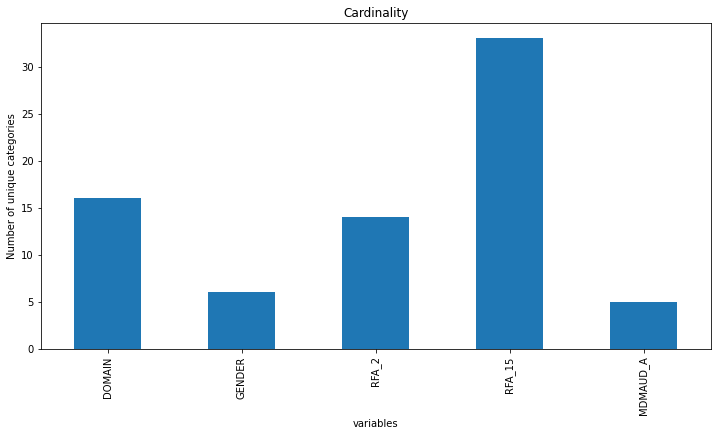

In [4]:
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']
df = pd.read_csv("cup98LRN.txt",usecols=cols)
df = df.replace(" ",np.nan)
df.nunique() # number of unique categories in each feature - nunique() funciton can be used in the entire dataframe
df.nunique(dropna=False) # it consider missing values as an additional category
df[["DOMAIN","GENDER"]].nunique() # number of unique categories in specified features
df.GENDER.unique() # unique categories of given feature - unique() function works only on a pandas Series
df.nunique().plot.bar(figsize=(12,6)) # plot which shows cardinality of each variable
plt.ylabel("Number of unique categories")
plt.xlabel("variables")
plt.title("Cardinality")

### 4. Pinpointing rare categories in categorical variables

* consider a label to be rare when it appears in less than 5% or 1% of the population
* By default, pandas read_csv()  uses the first row of the data as the column names. If the column names are not part of the raw data, we need to specifically tell pandas not to assign the column names by adding the header = None argument.

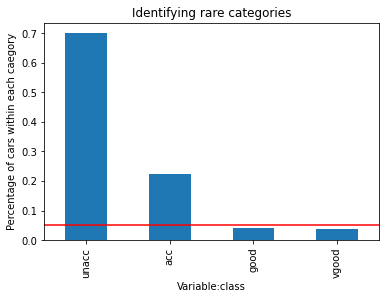

In [5]:
df = pd.read_csv('car.data',header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df["class"].unique()
label_freq = df["class"].value_counts()/len(df) # percentage of cars per category

fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel("Percentage of cars within each caegory")
fig.set_xlabel("Variable:class")
fig.set_title("Identifying rare categories")
plt.show()
# The good and vgood categories are present in less than 5% of cars, as indicated by the red line in the preceding plot

### 5. Identifying a linear relationship
* Linear relationships can be evaluated by scatter plots and residual plots
* Scatter plots output the relationship of the independent variable X and the target Y
* Residuals are the difference between the linear estimation of Y using X and the real target
* If the relationship is linear, the residuals should follow a normal distribution centered at zero

C:\Users\Honey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 20.80000000000002, 'Residuals')

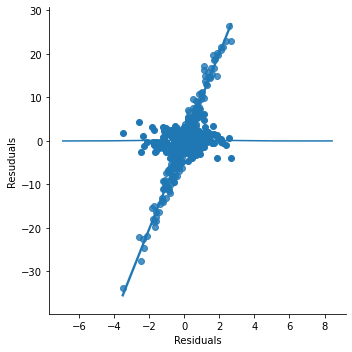

In [6]:
np.random.seed(29) # seed() function used for reproducing the same data again
x=np.random.randn(200) # Create an x variable with 200 observations that are normally distributed
y = x*10 + np.random.randn(200)*2 # Create a y variable that is linearly related to x with some added random noise
df = pd.DataFrame([x,y]).T # Create a dataframe with the x and y variables
df.columns = ["x","y"] # Assign column names to dataframe

sns.lmplot(x="x",y="y",data=df,order=1) # Plot a scatter plot to visualize the linear relationship - order = 1 for linear model
plt.ylabel("Target")
plt.xlabel("Independent variable")

linreg = LinearRegression() # Build a linear regression model between x and y
# Scikit-learn predictor classes do not take pandas Series as arguments
# Because data['x'] is a pandas Series, we need to convert it into a dataframe using to_frame()
linreg.fit(df["x"].to_frame(),df["y"])
predictions = linreg.predict(df['x'].to_frame()) # Make predictions of y using the fitted linear model
residuals = df["y"]-predictions

plt.scatter(y=residuals,x=df['x']) # scatter plot of the independent variable x and the residuals
plt.ylabel("Resuduals")
plt.xlabel("Independent variable x")

sns.distplot(residuals,bins=30) # evaluate the distribution of the residuals
# residuals are normally distributed and centered around zero
plt.xlabel("Residuals")

### 6. Identifying a normal distribution
* Linear models assume that the independent variables are normally distributed
* Failure to meet this assumption may produce algorithms that perform poorly
* We can determine whether a variable is normally distributed with histograms and Q-Q plots
* In a Q-Q plot, the quantiles of the independent variable are plotted against the expected quantiles of the normal distribution
* If the variable is normally distributed, the dots in the Q-Q plot should fall along a 45 degree diagonal

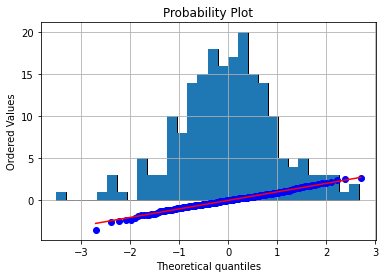

In [7]:
np.random.seed(29)
x = np.random.randn(200)
df = pd.DataFrame([x]).T
df.columns = ['x']
sns.histplot(df['x'],bins=30) # histogram and a density plot of the variable distribution
df['x'].hist(bins=30)
stats.probplot(df['x'],dist='norm',plot=plt) # Create and display a Q-Q plot to assess a normal distribution
plt.show()

### 7. Distinguishing variable distribution

C:\Users\Honey\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

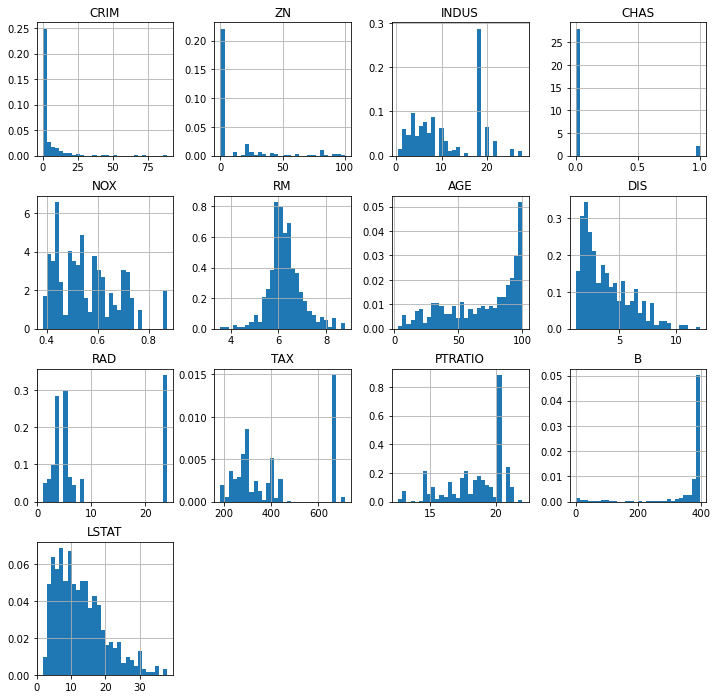

In [8]:
from sklearn.datasets import load_boston # load the Boston House Prices dataset from scikit-learn
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston.hist(bins=30,figsize=(12,12),density=True) # Visualize the variable distribution with histograms
plt.show() # Most of the numerical variables in the dataset are skewed

### 8. Highlighting outliers
* An outlier is a data point that is significantly different from the remaining data
* On occasions, outliers are very informative
* for example, when looking for credit card transactions, an outlier may be an indication of fraud
* In other cases, outliers are rare observations that do not add any additional information
* These cases may also affect the performance of some machine learning models

C:\Users\Honey\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

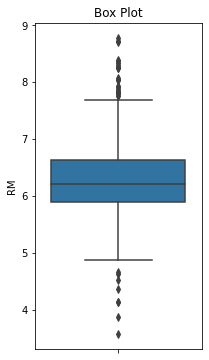

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 476, dtype: float64

In [9]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)[["RM","LSTAT","CRIM"]]

plt.figure(figsize=(3,6))
sns.boxplot(y=boston["RM"])
plt.title("Box Plot")
plt.show()

def find_boundaries(df,variable,distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - IQR*distance
    upper_boundary = df[variable].quantile(0.75) + IQR*distance
    
    return lower_boundary, upper_boundary

# Calculate and then display the IQR proximity rule boundaries for the RM variable
lower_boundary, upper_boundary = find_boundaries(boston,'RM',1.5)

# Create a boolean vector to flag observations outside the boundaries 
outliers = np.where(boston['RM']>upper_boundary,True,np.where(boston['RM']<lower_boundary,True,False))
outliers.sum()

# Create a new dataframe with the outlier values
outliers_df = boston.loc[outliers,'RM']
outliers_df.head()

boston.loc[~outliers,'RM'] # To remove the outliers from the dataset

### 9. Comparing feature magnitude
* Many machine learning algorithms are sensitive to the scale of the features
* For example,the coefficients of linear models are directly informed by the scale of the feature
* In addition, features with bigger value ranges tend to dominate over features with smaller ranges
* Having features within a similar scale also helps algorithms converge faster, thus improving performance and training times

In [10]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
# Print main statistics for each variable - mean, count, std. deviation, median, quantiles, and minimum and maximum values
df.describe()
df.max()-df.min() # Range

C:\Users\Honey\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
dtype: float64